In [1]:
%matplotlib inline
path = "data/plants/"

In [2]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [3]:
import utils; reload(utils)
from utils import plots

Using Theano backend.


# 开始训练

In [19]:
batch_size=5
import vgg16; reload(vgg16)
from vgg16 import Vgg16
vgg = Vgg16()

In [21]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 420 images belonging to 9 classes.
Found 90 images belonging to 9 classes.
Epoch 1/1
420/420 [==============================] - 555s - loss: 2.7722 - acc: 0.3310 - val_loss: 1.1042 - val_acc: 0.7000


In [5]:
# batches = vgg.get_batches(path+'train', batch_size=4)

Found 421 images belonging to 9 classes.


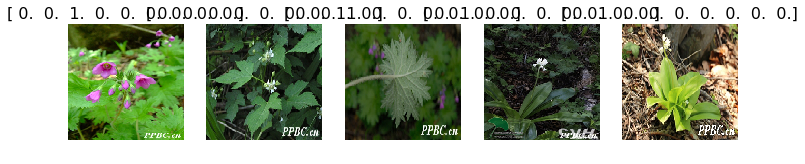

In [29]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [30]:
vgg.predict(imgs, True)

(array([ 0.8716,  0.5026,  0.3195,  0.9908,  0.6726], dtype=float32),
 array([2, 5, 2, 1, 1]),
 ['Cortusa matthioli subsp. pekinensis',
  'Moehringia lateriflora',
  'Cortusa matthioli subsp. pekinensis',
  'Clintonia udensis',
  'Clintonia udensis'])

In [24]:
vgg.classes[:10]

['Arenaria_juncea',
 'Clintonia udensis',
 'Cortusa matthioli subsp. pekinensis',
 'Erysimum_amurense',
 'Gymnadenia conopsea',
 'Moehringia lateriflora',
 'Polygonatum involucratum',
 'Rubus crataegifolius',
 'Scutellaria regeliana var. ikonnikovii']

In [25]:
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)
model = vgg.model

In [26]:
model.save_weights(model_path+'finetune1.h5')

ls: models: No such file or directory
